
## A 

### 1 
How can the organization best allocate resources to direct sales, improve service provision, and or client facing services in order to maximize  monthly revenue or  'MonthlyCharge' ?

### 2 

The goals of this data analysis are to indentify correlations and relationships in the data set that are actionable and have a positive correlation with 'MonthlyCharge'.

## B. 
### 1. 
Linear Relationship: The core premise of multiple linear regression is the existence of a linear relationship between the dependent (outcome) variable and the independent variables. This linearity can be visually inspected using scatterplots, which should reveal a straight-line relationship rather than a curvilinear one.

Multivariate Normality: The analysis assumes that the residuals (the differences between observed and predicted values) are normally distributed. This assumption can be assessed by examining histograms or Q-Q plots of the residuals, or through statistical tests such as the Kolmogorov-Smirnov test.

No Multicollinearity: It is essential that the independent variables are not too highly correlated with each other, a condition known as multicollinearity. This can be checked using:
Correlation matrices, where correlation coefficients should ideally be below 0.80.

Variance Inflation Factor (VIF), with VIF values above 10 indicating problematic multicollinearity. Solutions may include centering the data (subtracting the mean score from each observation) or removing the variables causing multicollinearity.

(Assumptions of multiple linear regression 2024)
### 2. 
 One benefit of python is that it is an interpreted language. There is no compile time, so it is much quicker for iterative processes such as the backward elimination process when we are reducing the regression model and removing independent variables.

 Another benefit of python language is that it has many libraries and packages that can automate the regression model creation process and simplify it to just a few lines of code. When it is time to compare the reduced model, the python packages can help us quickly compare the models by showing us important regression model metrics such as adjusted R squared, and the p values of coefficients.

 ### 3 
 Multiple linear regression is an appropriate technique to use for analyzing the research question in part 1 because the question we are answering involves predicting a continuous variable 'MonthlyCharge'. Another reason multiple linear regression is an appropriate technique is because part of the question involves identifying correlations between multiple predictor variables and one continuous dependent variable.


## C. 
### 1. 

My data cleaning goals are as follows:

Identify any duplicate rows and remove them. I will do this by comparing rows by 'CaseOrder'. If there are any duplicates I will drop one of the duplicate rows.

Identify any missing values. I will use  the df.isna() function to list columns with missing values. I will impute the values with different techniques
depending on the data type and context of each column.

Identify any outliers. I will use z-scores, IQR tests and the describe() method to identify outliers. I will first use the describe() function to get an overview, and if further analysis is needed I can use z-scores and IQR tests to further identify outliers. If a value is clearly an outlier, it can be imputed from other values or the row dropped.

## See cells below for further explanation of each step and annotated code. 



In [1]:
#import libraries and read in the data from file.
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Assuming your CSV file is named 'data.csv', adjust the file path as needed
file_path = '/home/dj/skewl/d208/churn_clean.csv'
pd.set_option('display.max_columns', None)
# Read the data from the CSV file into a DataFrame
df = pd.read_csv(file_path)
#drop index column
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

In [2]:
# helper functions

#function to plot histogram univariate
def plot_hist(col_name, num_bins, do_rotate=False):
    plt.hist(df[col_name], bins=num_bins)
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col_name}')
    if do_rotate:
        plt.xticks(rotation=90)
    plt.show()

def line_plot(indep):
    # hexbin plot for continuous variables
    plt.hexbin(df[indep], df['MonthlyCharge'], gridsize=10)
    plt.colorbar()
    plt.title('Hexbin Plot')
    plt.xlabel(indep)
    plt.ylabel('MonthlyCharge')
    plt.show()

def box_plot(indep):
    # Box plot for categorical predictor and continuous outcome variable
    df.boxplot(column='MonthlyCharge', by=indep)
    plt.title('Box Plot',y=.5)
    plt.xlabel(indep)
    plt.ylabel('MonthlyCharge')
    plt.show()

### identify duplicate rows by 'CaseOrder' {-}

In [3]:
# Find duplicate rows 
duplicate_rows = df.duplicated(["CaseOrder"]).sum()

# Print duplicate rows   # found NO duplicate rows here!
print(duplicate_rows)


0


### identify missing values 

In [4]:
# Identify missing values using isna() method
missing_values = df.isna().sum()
# Print DataFrame with True for missing values and False for non-missing values
print(missing_values)

# no missing values here!

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

### Check for outliers 

In [5]:
# check for outliers. Doesn't seem to be any outliers.
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


## 2.  Describe dependent and independent variables {-}

In [6]:
## dependent variable

df['MonthlyCharge'].describe()


count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [7]:
# independent variable
df['Gender'].describe()


count      10000
unique         3
top       Female
freq        5025
Name: Gender, dtype: object

In [8]:
df['Area'].describe()

count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object

In [9]:
df['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [10]:
df['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [11]:
df['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [12]:
df['InternetService'].describe()

count           10000
unique              3
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

In [13]:
df['Phone'].describe()

count     10000
unique        2
top         Yes
freq       9067
Name: Phone, dtype: object

In [14]:
df['OnlineSecurity'].describe()

count     10000
unique        2
top          No
freq       6424
Name: OnlineSecurity, dtype: object

In [15]:
df['DeviceProtection'].describe()

count     10000
unique        2
top          No
freq       5614
Name: DeviceProtection, dtype: object

In [16]:
df['StreamingMovies'].describe()

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object

In [17]:
df['OnlineBackup'].describe()

count     10000
unique        2
top          No
freq       5494
Name: OnlineBackup, dtype: object

## 3.  Generate univariate and bivariate visualizations of the distributions of the dependent and independent variables, including the dependent variable in your bivariate visualizations. 

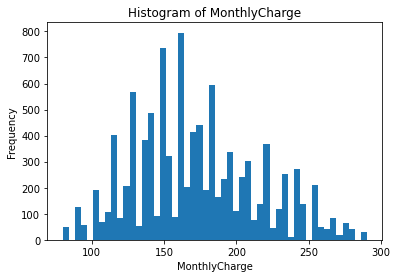

In [18]:
plot_hist('MonthlyCharge',50)

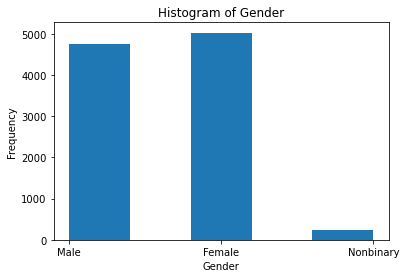

In [19]:
plot_hist('Gender',5)

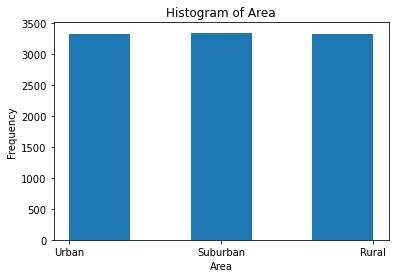

In [20]:
plot_hist('Area',5)

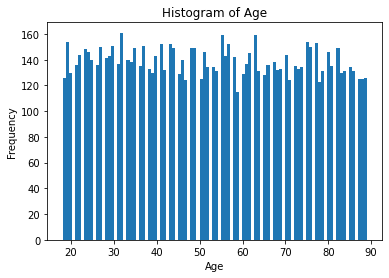

In [21]:
plot_hist('Age',100)

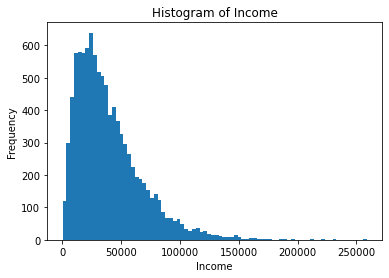

In [22]:
plot_hist('Income',80)

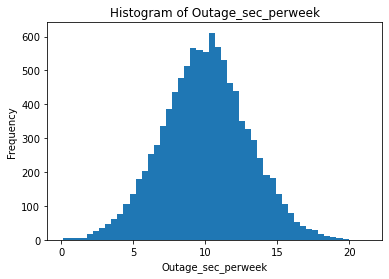

In [23]:
plot_hist('Outage_sec_perweek',50)

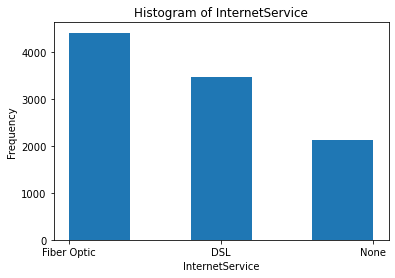

In [24]:
plot_hist('InternetService',5)

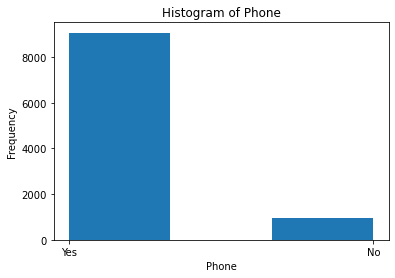

In [25]:
plot_hist('Phone',3)

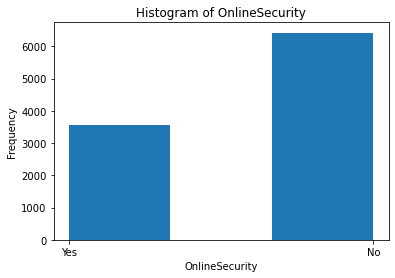

In [26]:
plot_hist('OnlineSecurity',3)

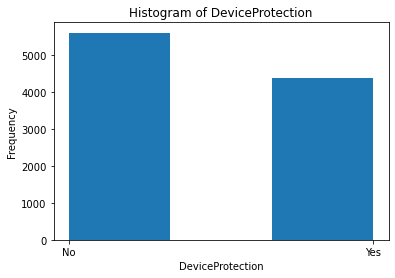

In [27]:
plot_hist('DeviceProtection',3)

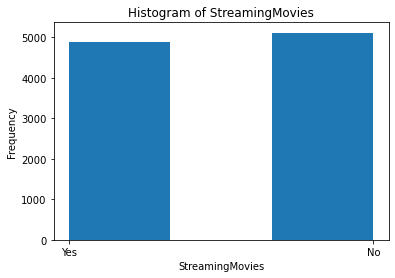

In [28]:
plot_hist('StreamingMovies',3)

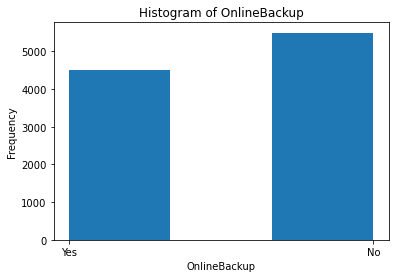

In [29]:
plot_hist('OnlineBackup',3)

## bivariate - graphing against the dependent variable {-}

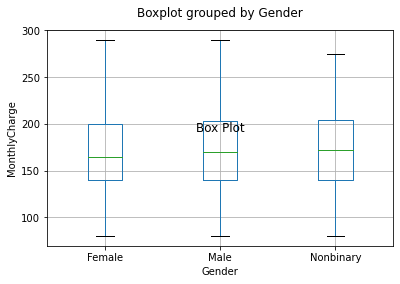

In [30]:
box_plot('Gender')

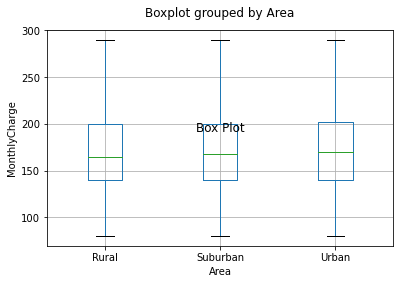

In [31]:
box_plot('Area')

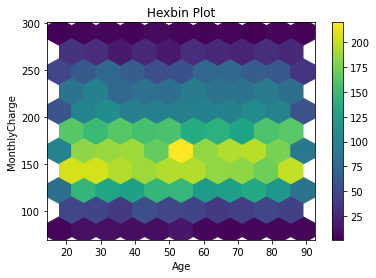

In [32]:
line_plot('Age')

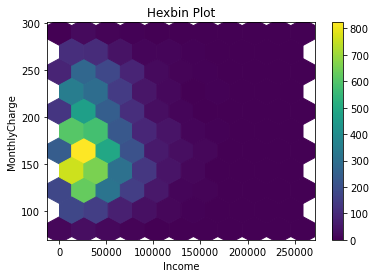

In [33]:
line_plot('Income')

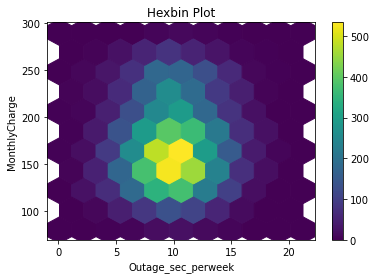

In [34]:
line_plot('Outage_sec_perweek')

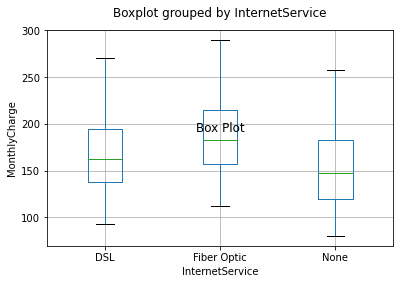

In [35]:
box_plot('InternetService')

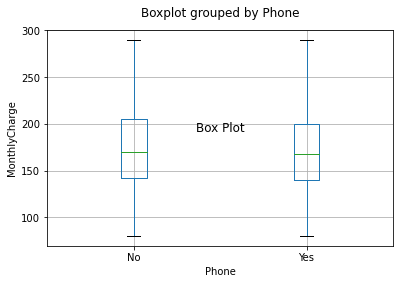

In [36]:
box_plot('Phone')

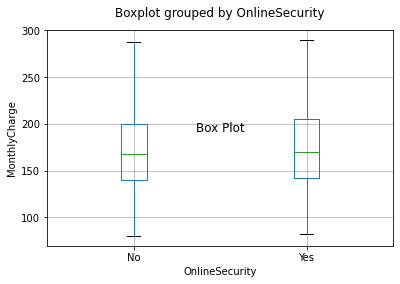

In [37]:
box_plot('OnlineSecurity')

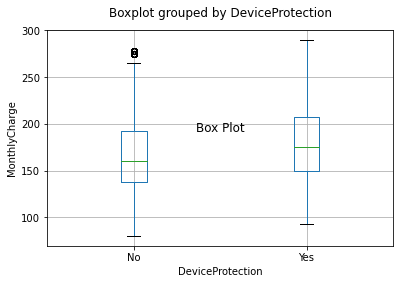

In [38]:
box_plot('DeviceProtection')

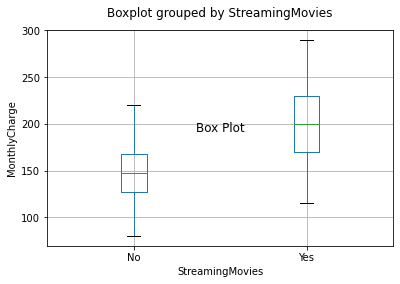

In [39]:
box_plot('StreamingMovies')

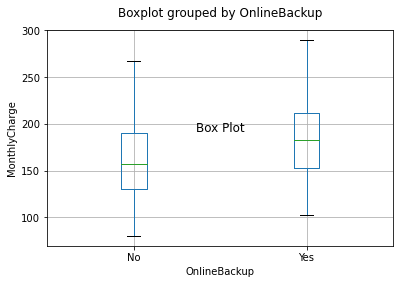

In [40]:
box_plot('OnlineBackup')

### 4) 
My goals for data transformation are to one-hot encode the categorical variables and then normalize all values. I will split the date into groups by type, then I will use the getDummies() function to one-hot encode the categorical variables. After that I will concatenate them and normalize all of them with skLearn MinMaxScaler.

In [41]:
#split continuous and categorical variables into separate dataframes
dfcon = df[['Age','Income','Outage_sec_perweek']]
dfcat = df[['Gender','Area','InternetService','Phone','OnlineSecurity','DeviceProtection','StreamingMovies','OnlineBackup']]
#one-hot encode categorical data and drop first level of each
dfcat_encoded = pd.get_dummies(dfcat,drop_first=True)
#concatenate the columns
data = pd.concat([dfcon, dfcat_encoded], axis=1)
#normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
#write the prepared data to .csv file
df_normalized.to_csv('prepared-data.csv', index=False)

## D. Compare an initial and a reduced linear regression model 

### 1. Construct an initial multiple linear regression model from all independent variables that were identified in part C2. {-}



In [42]:
#Initial Model

import statsmodels.api as sm
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
independent_vars = sm.add_constant(df_normalized)
model = sm.OLS(df['MonthlyCharge'], independent_vars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     887.1
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:32:22   Log-Likelihood:                -47747.
No. Observations:               10000   AIC:                         9.552e+04
Df Residuals:                    9985   BIC:                         9.563e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## 2.  &nbsp;&nbsp;&nbsp;   Justify a statistically based feature selection procedure or a model evaluation metric to reduce the initial model in a way that aligns with the research question. 


&nbsp;&nbsp;&nbsp;  I have chosen to use backward elimination of predictor variables as my feature selection procedure. This is so I can iteratively choose which predictor variables I want to keep based on p values. This is an effective way to reduce the model because I  may choose to keep some predictor variables that may not necessarily meet standard thresholds of p < .05. This will enable me to more precisely answer the research question by identifying the effect of these predictor variables on the outcome variable even though they may not meet the p > .05 criteria. So even though the predictors may have a slightly larger p value we can still answer questions about how a variable correlates to 'MonthlyCharge. We not only want to predict future values of 'MonthlyCharge' but also know how a given predictor variable will correlate with things like the magnitude and sign of the coefficient so it may be wise to include them in the model. Also a predictor variable may have a good p value but won't be practically significant. With this feature selection method I have more control to actually get meaningful information about what the correlations are to 'monthlyCharge'.

&nbsp;&nbsp;&nbsp;  I have chosen to use the adjusted r squared value as an evaluation metric. I have chose this one in particular because it will penalize for overfitting the model. It will more accurately predict goodness of fit with models with large numbers of predictor variables such as this one. Since it takes into account overfitting, I am less likely to create a model that uses redundant data and inaccurately defines the correlations of each predictor variable leading to false information about correlations to 'MonthlyCharge.'


### 3.   Provide a reduced linear regression model that follows the feature selection or model evaluation process in part D2, including a screenshot of the output for each model. 

In [43]:
#original model
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
independent_vars = sm.add_constant(df_normalized)
model = sm.OLS(df['MonthlyCharge'], independent_vars).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     887.1
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:32:22   Log-Likelihood:                -47747.
No. Observations:               10000   AIC:                         9.552e+04
Df Residuals:                    9985   BIC:                         9.563e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Reduced model 

In [44]:

#Reduced model
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
del df_normalized['Area_Urban']
del df_normalized['Area_Suburban']
del df_normalized['Age']
del df_normalized['Outage_sec_perweek']
del df_normalized['Gender_Male']
del df_normalized['Gender_Nonbinary']
del df_normalized['Phone_Yes']
independent_vars = sm.add_constant(df_normalized)
model = sm.OLS(df['MonthlyCharge'], independent_vars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     1774.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:32:22   Log-Likelihood:                -47749.
No. Observations:               10000   AIC:                         9.551e+04
Df Residuals:                    9992   BIC:                         9.557e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## E. 
### 1.Explain your data analysis process by comparing the initial multiple linear regression model and reduced linear regression model 

  I used backwards elimination to reduce the model by P value. My model evaluation metric is R squared. Since I had predictor variables that had large coefficients, the R squared value was about the same in both models.This is because the predictor variables with the largest coefficients and smallest P values were not removed.
I chose to leave the 'Income' variable in so I had one continuous variable in the model even though the P value was higher than .05. I simplified the model and was able to keep the same R squared value. The F statistic did improve as a result of reducing the independent variables.

   Original F statistic = 887.1

   Reduced model F statistic = 1774
  
   Original R squared = .554

   Reduced model R squared = .554

   
## 2.  Provide the output and all calculations of the analysis you performed, including the following elements for your reduced linear regression model 

In [45]:
#calculations to reduce original model
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
del df_normalized['Area_Urban']
del df_normalized['Area_Suburban']
del df_normalized['Age']
del df_normalized['Outage_sec_perweek']
del df_normalized['Gender_Male']
del df_normalized['Gender_Nonbinary']
del df_normalized['Phone_Yes']
independent_vars = sm.add_constant(df_normalized)
model = sm.OLS(df['MonthlyCharge'], independent_vars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     1774.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:32:22   Log-Likelihood:                -47749.
No. Observations:               10000   AIC:                         9.551e+04
Df Residuals:                    9992   BIC:                         9.557e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## residual plot 

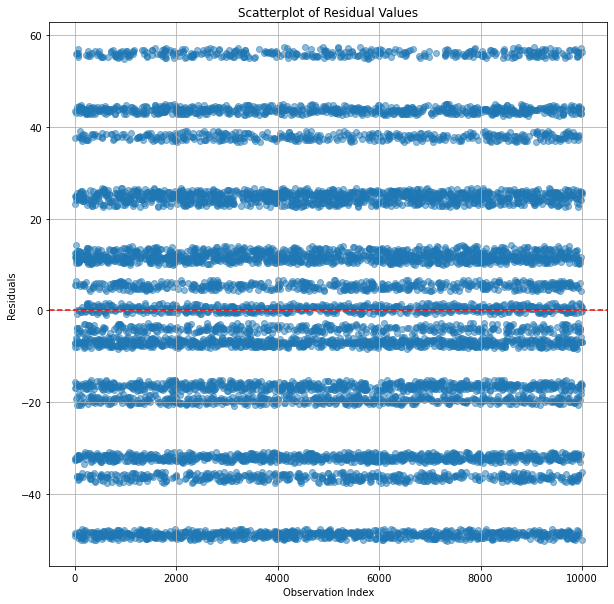

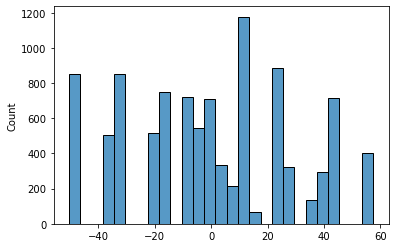

In [46]:
# Create a scatterplot of residual values
residuals = model.resid
plt.figure(figsize=(10, 10))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Scatterplot of Residual Values')
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
# Create a histogram of residual values
sns.histplot(residuals);


## residual standard error 

In [47]:
 np.sqrt(np.sum(model.resid**2)/model.df_resid)

28.68326943378445

## 3. code will  be submitted with assignment. 

## F. 
### 1.  Discuss the results of your data analysis 
#### regression equation : 
Y = 125.2414 + 19.959(X) + -13.9448(X) + 2.7878(x) + 12.7159((x) + 51.8573(X) + 22.1003(X)
#### Interpretation of coefficients: 
    The coefficient itself is the magnitude which represents the strength of the relationship.
    
    The sign tells us if the relationship is negative or positive to the value of the dependent variable.
    
    all these coefficients have a p value of < .05 so they are statistically significant.
    Income                          0.6674   is the magnitude and it has a positive correlation with 'MonthlyCharge'. 
    InternetService_Fiber Optic    19.1959   is the magnitude and it has a positive correlation with 'MonthlyCharge'.   
    InternetService_None          -13.9448   is the magnitude and it has a negative correlation with 'MonthlyCharge'.
    OnlineSecurity_Yes              2.7878   is the magnitude and it has a positive correlation with 'MonthlyCharge'.   
    DeviceProtection_Yes           12.7159   is the magnitude and it has a positive correlation with 'MonthlyCharge'. 
    StreamingMovies_Yes            51.8573   is the magnitude and it has a positive correlation with 'MonthlyCharge'.   
    OnlineBackup_Yes               22.1003   is the magnitude and it has a positive correlation with 'MonthlyCharge'.  
    
    


#### All other predictors must be constant for these rules to work. 
 
 
   ### For continuous predictors:
### A one-unit increase in the predictor variable is associated with a change in the value of the dependent variable equal to the coefficient value, holding all other predictors constant.

 ###   For categorical predictors (dummy variables):
### The coefficient represents the difference in the value of the dependent variable between the reference category (usually the category with the value of 0) and the category represented by the dummy variable.
       
        const is the y intercept.
    
    A one unit increase in 'Income' will result in a change in the dependent variable equal to the coefficient .6674.
    
    Observing 'InternetService_Fiber_Optic' True will result in the difference of it's coefficient and the reference category coefficient being applied to the dependent variable.
    
     Observing 'InternetService_None' True will result in the difference  of it's coefficient and the reference category coefficient being applied to the the dependent variable.
     
    Observing 'DeviceProtection_yes' True will result in the difference in it's coefficient and the reference category coefficient being applied to the the dependent variable.
    
     Observing 'Streaming_Movies_Yes' True will result in the difference of it's coefficient and the reference category coefficient being applied to the  the dependent variable.
     
     Observing 'Online_Backup_Yes' True will result in the difference of it's coefficient and the reference category coefficient being applied to the dependent variable.
     
    Observing 'Online_Security_Yes' True will result in the difference of it's coefficient and the reference category coefficient being applied to the dependent variable.
    
### significance

  I think that the practical significance of this reduced model is not that great. That is because it basically shows us some common sense things that we could just guess. Such as if a person subscribes to more services the monthly charge would be greater.


  The statistical significance here is moderate because the coefficients show what we could guess with common sense. So the coefficients provide valuable information. The measure of statistical signifance that I used was asjusted R squared. At .554 this shows that the statistical signifance of the reduced model could be much better. This lower adjusted R squared metric shows that there is variance in the dependent variable that is not explained in the independent variables. This is also evident by looking at the plots of residual standard error.
  
#### Limitations.
   Some of the limitations of this analysis are that the model works better with normally distributed variables that have a linear correlation with the outcome variable. Another limitation is that the standard error can be pretty large. A third limitation is that this only works for continuous variables outcome variables.

### 2.   

   My recommendations based on this analysis are that the organization should allocate resources to the sales team to upsell more services to increase the 'MonthlyCharge' for each customer. We could have guessed that maybe, but the data is here to confirm that and remove any doubt. 




### Citations 

Assumptions of multiple linear regression (2024) Statistics Solutions. Available at: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-multiple-linear-regression/ (Accessed: 11 April 2024). 


Dansbecker (2018) Using categorical data with one hot encoding, Kaggle. Available at: https://www.kaggle.com/code/dansbecker/using-categorical-data-with-one-hot-encoding (Accessed: 11 April 2024). 


How to replace column values in a pandas DataFrame (2023) Saturn Cloud Blog. Available at: https://saturncloud.io/blog/how-to-replace-column-values-in-a-pandas-dataframe/ (Accessed: 06 April 2024). 

In [48]:
import sys
print(sys.version)


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
